In [6]:
import numpy as np

input_size = 10
hidden_size = 20
output_size = 10

Wxh = np.random.randn(hidden_size, input_size)* 0.01
Whh = np.random.randn(hidden_size, hidden_size)* 0.01
Why = np.random.randn(output_size, hidden_size)* 0.01

bh = np.zeros((hidden_size, 1))
by = np.zeros((output_size, 1))

parameters = {
    'Wxh': Wxh,
    'Whh': Whh,
    'Why': Why,
    'bh': bh,
    'by': by
}

In [7]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

def forward_propagation(inputs, h_prev, parameters):
    Wxh, Whh, Why = parameters['Wxh'], parameters['Whh'], parameters['Why']
    bh, by = parameters['bh'], parameters['by']

    xs, hs, ps = {}, {}, {}
    hs[-1] = np.copy(h_prev)

    for t in range(len(inputs)):
        xs[t] = inputs[t]
        hs[t] = np.tanh(np.dot(Wxh, xs[t]) + np.dot(Whh, hs[t-1]) + bh)
        ps[t] = softmax(np.dot(Why, hs[t]) + by)

    return xs, hs, ps, hs[len(inputs) - 1]

In [8]:
def backward_propagation(inputs, targets, xs, hs, ps, parameters):
    Wxh, Whh, Why = parameters['Wxh'], parameters['Whh'], parameters['Why']

    dWxh, dWhh, dWhy = np.zeros_like(Wxh), np.zeros_like(Whh), np.zeros_like(Why)
    dbh, dby = np.zeros_like(parameters['bh']), np.zeros_like(parameters['by'])
    dhnext = np.zeros_like(hs[0])

    for t in reversed(range(len(inputs))):
        dy = np.copy(ps[t])
        dy -= targets[t]

        dWhy += np.dot(dy, hs[t].T)
        dby += dy
        dh = np.dot(Why.T, dy) + dhnext

        dhraw = (1 - hs[t] * hs[t]) * dh

        dbh += dhraw
        dWxh += np.dot(dhraw, xs[t].T)
        dWhh += np.dot(dhraw, hs[t-1].T)

        dhnext = np.dot(Whh.T, dhraw)

    gradients = {'dWxh': dWxh, 'dWhh': dWhh, 'dWhy': dWhy, 'dbh': dbh, 'dby': dby}
    for grad in gradients:
        np.clip(gradients[grad], -5, 5, out=gradients[grad])

    return gradients

In [9]:
def update_parameters(parameters, gradients, learning_rate):
    for key in parameters.keys():
        parameters[key] -= learning_rate * gradients['d' + key]
    return parameters

def calculate_loss(ps, targets):
    loss = 0
    for t in range(len(targets)):
        target_index = np.argmax(targets[t])
        loss -= np.log(ps[t][target_index, 0])
    return loss

def train_rnn(inputs, targets, parameters, learning_rate=0.01, epochs=1000):
    loss_history = []
    h_prev = np.zeros((hidden_size, 1))

    for epoch in range(epochs):
        xs, hs, ps, h_prev = forward_propagation(inputs, h_prev, parameters)

        loss = calculate_loss(ps, targets)
        loss_history.append(loss)

        gradients = backward_propagation(inputs, targets, xs, hs, ps, parameters)
        parameters = update_parameters(parameters, gradients, learning_rate)

        if epoch % 100 == 0:
            print(f"epoch {epoch}, loss: {loss:.4f}")

    return parameters, loss_history

epoch 0, loss: 11.5104
epoch 100, loss: 0.0272
epoch 200, loss: 0.0120
epoch 300, loss: 0.0077
epoch 400, loss: 0.0056
epoch 500, loss: 0.0044
epoch 600, loss: 0.0036
epoch 700, loss: 0.0031
epoch 800, loss: 0.0027
epoch 900, loss: 0.0024

Final loss after 1000 epochs: 0.0021


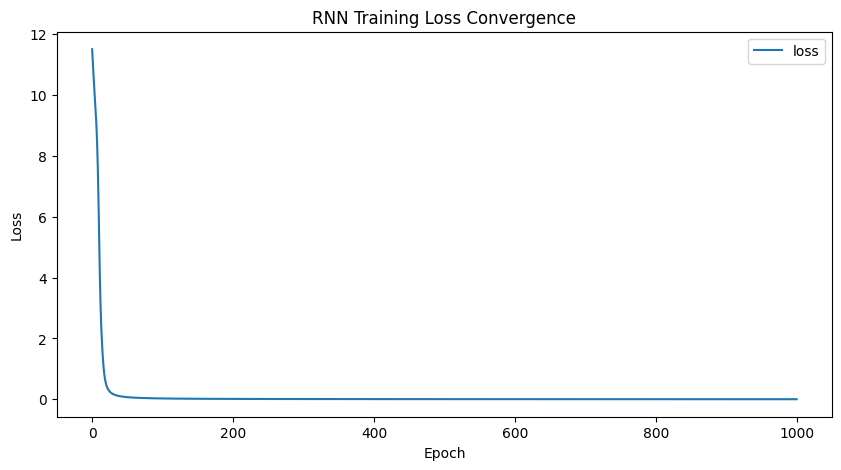

In [10]:
import matplotlib.pyplot as plt

seq_length = 5
inputs = [np.random.randn(input_size, 1) for _ in range(seq_length)]
targets = []
for _ in range(seq_length):
    target = np.zeros((output_size, 1))
    target[np.random.randint(0, output_size)] = 1
    targets.append(target)

trained_params, loss_history = train_rnn(inputs, targets, parameters, learning_rate=0.1, epochs=1000)

print(f"\nFinal loss after 1000 epochs: {loss_history[-1]:.4f}")

plt.figure(figsize=(10, 5))
plt.plot(loss_history, label='loss')
plt.title('RNN Training Loss Convergence')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()